In [21]:
import numpy as np 
import pandas as pd 

# Read the dataset and merge the files

In [22]:
df1 = pd.read_json('Sarcasm_Headlines_Dataset.json',lines = True)
df2 = pd.read_json('Sarcasm_Headlines_Dataset_v2.json', lines = True)

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  26709 non-null  object
 1   headline      26709 non-null  object
 2   is_sarcastic  26709 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 626.1+ KB


In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


In [25]:
df = pd.concat([df1,df2])
df.tail()

,article_link,headline,is_sarcastic
28614,https://www.theonion.com/jews-to-celebrate-ros...,jews to celebrate rosh hashasha or something,1
28615,https://local.theonion.com/internal-affairs-in...,internal affairs investigator disappointed con...,1
28616,https://www.huffingtonpost.com/entry/andrew-ah...,the most beautiful acceptance speech this week...,0
28617,https://www.theonion.com/mars-probe-destroyed-...,mars probe destroyed by orbiting spielberg-gat...,1
28618,https://www.theonion.com/dad-clarifies-this-no...,dad clarifies this not a food stop,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55328 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  55328 non-null  object
 1   headline      55328 non-null  object
 2   is_sarcastic  55328 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


# Cleaning the dataset

In [27]:
# Removing the article link from the Dataset
df = df.drop(["article_link"], axis=1)
df.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


In [28]:
df.isnull().sum()

headline        0
is_sarcastic    0
dtype: int64

Text(0.5, 1.0, 'Data Distribution')

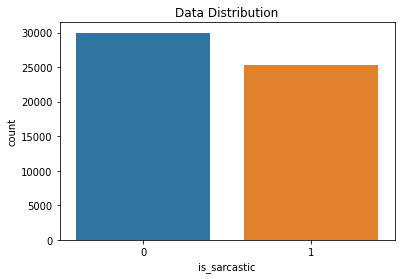

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x = "is_sarcastic", data = df)
plt.title("Data Distribution")

In [30]:
from nltk.tokenize import RegexpTokenizer

from nltk.corpus import stopwords

from nltk.stem import PorterStemmer

In [31]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()
tokenizer = RegexpTokenizer(r'\w+')


def preprocess(text):
  word_list = []
  tok = tokenizer.tokenize(text)
  for word in tok:
    if word not in stop_words:
      word_list.append(stemmer.stem(word))
  return " ".join(word_list)

In [33]:
x_data = df["headline"].apply(preprocess)
x_data.tail()

28614                      jew celebr rosh hashasha someth
28615    intern affair investig disappoint conspiraci g...
28616          beauti accept speech week came queer korean
28617    mar probe destroy orbit spielberg gate space p...
28618                                dad clarifi food stop
Name: headline, dtype: object

# Word Cloud creation for Sarcastic headlines

In [34]:
pip install wordcloud

In [35]:
SarNews = df[(df['is_sarcastic'])==1]
SarNews

,headline,is_sarcastic
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
8,top snake handler leaves sinking huckabee camp...,1
15,nuclear bomb detonates during rehearsal for 's...,1
16,cosby lawyer asks why accusers didn't come for...,1
...,...,...
28612,polish rapper under fire for use of the word '...,1
28614,jews to celebrate rosh hashasha or something,1
28615,internal affairs investigator disappointed con...,1
28617,mars probe destroyed by orbiting spielberg-gat...,1


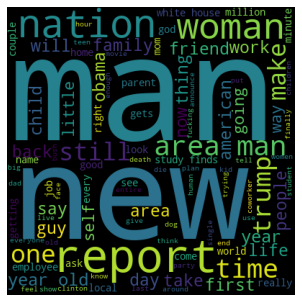

In [36]:
from wordcloud import WordCloud, STOPWORDS
words = '' 
stopwords = set(STOPWORDS) 
  
for val in SarNews.headline: 
      
    val = str(val) 
  
    tokens = val.split() 
      
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 400, height = 400, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# Word Cloud creation for Non-Sarcastic headlines

In [37]:

NonSarNews = df[(df['is_sarcastic'])==0]
NonSarNews

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
4,j.k. rowling wishes snape happy birthday in th...,0
5,advancing the world's women,0
6,the fascinating case for eating lab-grown meat,0
...,...,...
28607,what our grieving family needs from loved ones...,0
28608,stephen colbert attempts to list everything tr...,0
28609,bakery owner vows to stop making wedding cakes...,0
28613,how san antonio's dominant defense is fueling ...,0


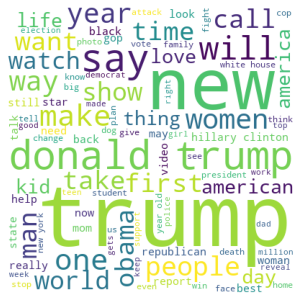

In [38]:
  
words = '' 
stopwords = set(STOPWORDS) 
  
for val in NonSarNews.headline: 
      
    val = str(val) 
  
    tokens = val.split() 
      
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 400, height = 400, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

# Train test Split 70-30 

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, df['is_sarcastic'].values, test_size=0.3, random_state=72)

# TF IDF vectorizations

In [58]:

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
x_train_tfidf = vectorizer.fit_transform(X_train)
x_test_tfidf = vectorizer.transform(X_test)
x_test_tfidf

<16599x17120 sparse matrix of type '<class 'numpy.float64'>'
	with 117143 stored elements in Compressed Sparse Row format>

In [41]:
df_idf = pd.DataFrame(vectorizer.idf_, index=vectorizer.get_feature_names(),columns=["idf_weights"])
 
# sort ascending
df_idf.sort_values(by=['idf_weights']).head()

,idf_weights
trump,3.772847
new,3.862265
man,3.931969
get,4.554961
year,4.557675


In [42]:
df_idf.sort_values(by=['idf_weights']).tail()

,idf_weights
shamer,10.871223
grapevin,10.871223
gravel,10.871223
grandilomentitudin,10.871223
lag,10.871223


# Model Creations

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_tfidf,y_train)
print(f"Training Score : {rf.score(x_train_tfidf, y_train)}")
print(f"Test Score : {rf.score(x_test_tfidf, y_test)}")

Training Score : 0.9999741795553719
Test Score : 0.9192120007229351


In [44]:
from sklearn.linear_model import LinearRegression
lre = LinearRegression() 
lre.fit(x_train_tfidf,y_train)
print(f"Training Score : {lre.score(x_train_tfidf, y_train)}")
print(f"Test Score : {lre.score(x_test_tfidf, y_test)}")

Training Score : 0.8190897033034968
Test Score : 0.45257177906383594


In [45]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression() 
lr.fit(x_train_tfidf,y_train)
print(f"Training Score : {lr.score(x_train_tfidf, y_train)}")
print(f"Test Score : {lr.score(x_test_tfidf, y_test)}")

Training Score : 0.887113016086137
Test Score : 0.8369178866196759


In [53]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier() 
knc.fit(x_train_tfidf,y_train)
print(f"Training Score : {knc.score(x_train_tfidf, y_train)}")
print(f"Test Score : {knc.score(x_test_tfidf, y_test)}")

Training Score : 0.80350641638049
Test Score : 0.720947045002711


In [57]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier() 
dtc.fit(x_train_tfidf,y_train)
print(f"Training Score : {dtc.score(x_train_tfidf, y_train)}")
print(f"Test Score : {dtc.score(x_test_tfidf, y_test)}")

Training Score : 1.0
Test Score : 0.9019820471112717


In [59]:
from sklearn.svm import SVC
svc = SVC() 
svc.fit(x_train_tfidf,y_train)
print(f"Training Score : {svc.score(x_train_tfidf, y_train)}")
print(f"Test Score : {svc.score(x_test_tfidf, y_test)}")

Training Score : 0.9930284799504248
Test Score : 0.9210795831074161
